In [3]:
from IPython.display import display, Markdown, Latex, Javascript
import emoji
import time
import ipywidgets as widgets
import ipython_blocking


display(Markdown('### 💠 F2 Terms Verification'))
#display(Markdown('> *' + time.ctime() +
#                 '* <br>Connect Power Meter to `Port 1` and press *Run* 💡 ![](gif/714.gif)'))

button = widgets.Button(
    description='Run',
    disabled=False,
    button_style='success',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='play'
)
button

### 💠 F2 Terms Verification

Button(button_style='success', description='Run', icon='play', style=ButtonStyle(), tooltip='Click me')

In [ ]:
%blockrun button

In [127]:
#button.layout.visibility = 'hidden'
display(Markdown('> *' + time.ctime() + '* <br>🔌 Connecting to the device, please wating... ![](gif/714.gif)'))

import visa
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%run DeviceBundle.py
   
rm = visa.ResourceManager()

legacy = DeviceBundle('Legacy device', rm, '192.168.1.212:5025')
ng = DeviceBundle('Nextgen device', rm, '192.168.1.85:5025')

widgets.HBox([legacy.box(), ng.box()])

> *Thu May 23 16:51:38 2019* <br>🔌 Connecting to the device, please wating... ![](gif/714.gif)

In [4]:
display(Markdown('### 💠 Connect to the devices and continue'))
button2 = widgets.Button(
    description='Continue',
    disabled=False,
    button_style='success',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='gear'
)
button2

### 💠 Step 2

Button(button_style='success', description='Start', icon='gear', style=ButtonStyle(), tooltip='Click me')

In [6]:
%blockrun button2

In [128]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import FloatSlider

inst = legacy.instance()
inst2 = ng.instance()
# @interact(points=FloatSlider(min=2, max=1e3, step=1, continuous_update=False, value = 201))
# def Points(points):
#     inst.write("SENS:SWE:POIN " + str(points))
    

In [111]:
import numpy as np
import time
from tqdm import tqdm_notebook

inst.write("SYST:PRES")
inst.write("*CLS")
inst.write("SENS:FREQ:STAR 1 MHz")
inst.write("SENS:CORR:CLE")
inst.write("SENS:CORR:COLL:CLE")
# inst.write("TRIG:SOUR INT")
# inst.write("TRIG:SOUR BUS")
# inst.query("TRIG:SOUR?")

inst.write("SENS:CORR:TRIG:FREE ON")
inst.query("SENS:CORR:TRIG:FREE?")
inst.query("SYST:ERR?")

'0,"No error"'

In [129]:
inst.write("SENS:FREQ:STAR 1 MHz")
inst.write("SENS:FREQ:STOP 4.8 GHz")
inst.write("SENS:CORR:COLL:METH:SOLT2 1,2")

inst2.write("SENS:FREQ:STAR 1 MHz")
inst2.write("SENS:FREQ:STOP 4.8 GHz")
inst2.write("SENS:CORR:COLL:METH:SOLT2 1,2")

(30, <StatusCode.success: 0>)

In [67]:
toggle = widgets.ToggleButtons(
    options=['Select:', 'Yes', 'No'],
    description='Collect data with standards?',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Description of slow', 'Description of regular', 'Description of fast'],
#     icons=['check'] * 3
)
toggle

ToggleButtons(description='Collect data with standards?', options=('Select:', 'Yes', 'No'), tooltips=('Descrip…

In [ ]:
%block toggle

In [68]:
toggle.layout.visibility = 'hidden'
if toggle.value == 'Yes':
    COLLECT = True

In [79]:
#if COLLECT:
inst.write("SENS:CORR:COLL:METH:SOLT2 1,2")
inst.query("SYST:ERR?")

%run StandardSteps.py

p1 = ReflectionStandardSteps(inst, {'OPEN','SHORT','LOAD'}, 1, 'Port 1')
p2 = ReflectionStandardSteps(inst, {'OPEN','SHORT','LOAD'}, 2, 'Port 2')
p12 = TransitionStandardsSteps(inst, {'THRU'}, 1, 2,'Port 1 > Port 2')

display(widgets.HBox((p1.box(), p2.box(), p12.box())))

apply_button = widgets.Button(
    description='Apply',
    disabled=False,
    button_style='info',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='gear'
)
apply_button

Button(button_style='info', description='Apply', icon='gear', style=ButtonStyle(), tooltip='Click me')

In [ ]:
#if COLLECT:
%blockrun apply_button

In [98]:
# сохранить собранные данные по мерам в файлы и отобразить графики

load_data = inst.query_ascii_values('SENS:CORR:COLL:DATA:LOAD? 1', container=np.array, converter='e')
complex_load = load_data.astype(np.float32).view(np.complex64)

open_data = inst.query_ascii_values('SENS:CORR:COLL:DATA:OPEN? 1', container=np.array, converter='e')
complex_open = open_data.astype(np.float32).view(np.complex64)

short_data = inst.query_ascii_values('SENS:CORR:COLL:DATA:SHOR? 1', container=np.array, converter='e')
complex_short = short_data.astype(np.float32).view(np.complex64)

np.savetxt('load.txt', complex_load.view(np.complex64))
np.savetxt('open.txt', complex_open.view(np.complex64))
np.savetxt('short.txt', complex_short.view(np.complex64))

fig, axs = plt.subplots(1, 3)
axs[0].plot(complex_load.real,complex_load.imag, '-')
axs[0].set_aspect('equal')
axs[0].set_title('load', fontsize=10)
axs[1].plot(complex_open.real,complex_open.imag, '-')
axs[1].set_aspect('equal', 'box')
axs[1].set_title('open', fontsize=10)
axs[2].plot(complex_short.real,complex_short.imag, '-')
axs[2].set_aspect('equal', 'box')
axs[2].set_title('short', fontsize=10)

fig.tight_layout()

plt.show()

display(Markdown('### 💠 All data ready press apply'))


ValueError: When changing to a larger dtype, its size must be a divisor of the total size in bytes of the last axis of the array.

In [ ]:
%blockrun apply_button

In [ ]:
# применить калибровку и построить графики термов
inst.write("SENS:CORR:COLL:SAVE")

er = inst.query_ascii_values('SENS:CORR:COEF? ER,1,1', container=np.array, converter='e')
complex_er = er.astype(np.float32).view(np.complex64)

ed = inst.query_ascii_values('SENS:CORR:COEF? ED,1,1', container=np.array, converter='e')
complex_ed = ed.astype(np.float32).view(np.complex64)

es = inst.query_ascii_values('SENS:CORR:COEF? ES,1,1', container=np.array, converter='e')
complex_es = es.astype(np.float32).view(np.complex64)

fig2, axs2 = plt.subplots(1, 3)
axs2[0].plot(complex_er.real,complex_er.imag, '-')
axs2[0].set_aspect('equal')
axs2[0].set_title('ER\nReflection Error', fontsize=10)
axs2[1].plot(complex_ed.real,complex_ed.imag, '-')
axs2[1].set_aspect('equal', 'box')
axs2[1].set_title('ED\nDirectivity Error', fontsize=10)
axs2[2].plot(complex_es.real,complex_es.imag, '-')
axs2[2].set_aspect('equal', 'box')
axs2[2].set_title('ES\nSource Match Error', fontsize=10)

fig2.tight_layout()

plt.show()

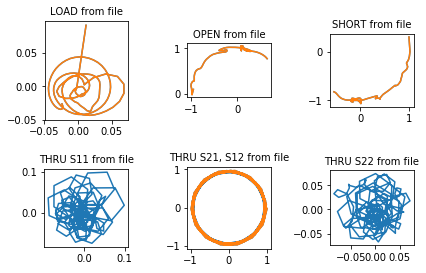

In [130]:
# read data from file
load1_r = np.loadtxt('LOAD1.txt', dtype=complex, converters={0: lambda s: complex(s.decode().replace('+-', '-'))})#.view(np.complex64)
open1_r = np.loadtxt('OPEN1.txt', dtype=complex, converters={0: lambda s: complex(s.decode().replace('+-', '-'))})#.view(np.complex64)
short1_r = np.loadtxt('SHORT1.txt', dtype=complex, converters={0: lambda s: complex(s.decode().replace('+-', '-'))})#.view(np.complex64)
load2_r = np.loadtxt('LOAD1.txt', dtype=complex, converters={0: lambda s: complex(s.decode().replace('+-', '-'))})#.view(np.complex64)
open2_r = np.loadtxt('OPEN1.txt', dtype=complex, converters={0: lambda s: complex(s.decode().replace('+-', '-'))})#.view(np.complex64)
short2_r = np.loadtxt('SHORT1.txt', dtype=complex, converters={0: lambda s: complex(s.decode().replace('+-', '-'))})#.view(np.complex64)
thru11_r = np.loadtxt('THRU1_1.txt', dtype=complex, converters={0: lambda s: complex(s.decode().replace('+-', '-'))})#.view(np.complex64)
thru22_r = np.loadtxt('THRU2_2.txt', dtype=complex, converters={0: lambda s: complex(s.decode().replace('+-', '-'))})#.view(np.complex64)
thru12_r = np.loadtxt('THRU1_2.txt', dtype=complex, converters={0: lambda s: complex(s.decode().replace('+-', '-'))})#.view(np.complex64)
thru21_r = np.loadtxt('THRU2_1.txt', dtype=complex, converters={0: lambda s: complex(s.decode().replace('+-', '-'))})#.view(np.complex64)

fig3, axs3 = plt.subplots(2, 3)
axs3[0,0].plot(load1_r.real,load1_r.imag, '-')
axs3[0,0].plot(load2_r.real,load2_r.imag, '-')
axs3[0,0].set_aspect('equal')
axs3[0,0].set_title('LOAD from file', fontsize=10)
axs3[0,1].plot(open1_r.real,open1_r.imag, '-')
axs3[0,1].plot(open2_r.real,open2_r.imag, '-')
axs3[0,1].set_aspect('equal', 'box')
axs3[0,1].set_title('OPEN from file', fontsize=10)
axs3[0,2].plot(short1_r.real,short1_r.imag, '-')
axs3[0,2].plot(short2_r.real,short2_r.imag, '-')
axs3[0,2].set_aspect('equal', 'box')
axs3[0,2].set_title('SHORT from file', fontsize=10)

axs3[1,0].plot(thru11_r.real,thru11_r.imag, '-')
axs3[1,0].set_aspect('equal')
axs3[1,0].set_title('THRU S11 from file', fontsize=10)
axs3[1,1].plot(thru21_r.real,thru21_r.imag, '-')
axs3[1,1].plot(thru12_r.real,thru12_r.imag, '-')
axs3[1,1].set_aspect('equal', 'box')
axs3[1,1].set_title('THRU S21, S12 from file', fontsize=10)
axs3[1,2].plot(thru22_r.real,thru22_r.imag, '-')
axs3[1,2].set_aspect('equal', 'box')
axs3[1,2].set_title('THRU S22 from file', fontsize=10)

fig3.tight_layout()

plt.show()


In [131]:
# загрузить данные мер в приложение и применить калибровку 

def push_to_device(inst, std_ports = [], open_data = [], short_data = [], load_data = [], thru_data = []):
    def push_to_device_reflections(inst, std_port, open_data, short_data, load_data):
        inst.write_ascii_values('SENS:CORR:COLL:DATA:LOAD '+ str(std_port) + ',', load_data.view(np.float64).tolist(), converter='e')
        #inst2.query("*OPC?")
        inst.query("SYST:ERR?")

        inst.write_ascii_values('SENS:CORR:COLL:DATA:OPEN '+ str(std_port) + ',', open_data.view(np.float64).tolist(), converter='e')
        #inst2.query("*OPC?")
        inst.query("SYST:ERR?")

        inst.write_ascii_values('SENS:CORR:COLL:DATA:SHOR '+ str(std_port) + ',', short_data.view(np.float64).tolist(), converter='e')
        #inst2.query("*OPC?")
        inst.query("SYST:ERR?")
        # применить калибровку

    def push_to_device_transitions(inst, std_ports = [], s = []):
        inst.write_ascii_values('SENS:CORR:COLL:DATA:THRU:MATC '\
                                + str(std_ports[0]) + ',' + str(std_ports[1]) + ',',\
                                s[0][0].view(np.float64).tolist(), converter='e')
        inst.write_ascii_values('SENS:CORR:COLL:DATA:THRU:TRAN '\
                                + str(std_ports[0]) + ',' + str(std_ports[1]) + ',',\
                                s[0][1].view(np.float64).tolist(), converter='e')
        inst.write_ascii_values('SENS:CORR:COLL:DATA:THRU:MATC '\
                                + str(std_ports[1]) + ',' + str(std_ports[0]) + ',',\
                                s[1][0].view(np.float64).tolist(), converter='e')
        inst.write_ascii_values('SENS:CORR:COLL:DATA:THRU:TRAN '\
                                + str(std_ports[1]) + ',' + str(std_ports[0]) + ',',\
                                s[1][1].view(np.float64).tolist(), converter='e')
        #inst2.query("*OPC?")
        inst.query("SYST:ERR?")
            
    push_to_device_reflections(inst, std_ports[0], open_data[0], short_data[0], load_data[0])
    push_to_device_reflections(inst, std_ports[1], open_data[1], short_data[1], load_data[1])
    push_to_device_transitions(inst, std_ports, thru_data)

thru_data = [[thru11_r, thru21_r], [thru12_r, thru22_r]]
#print(thru_data[0][0].view(np.float64).tolist())
push_to_device(inst, [1,2], [open1_r, open2_r], [short1_r, short2_r], [load1_r, load2_r], thru_data)
inst.write("SENS:CORR:COLL:METH:SOLT2 1,2")
inst.query("SYST:ERR?")

push_to_device(inst2, [1,2], [open1_r, open2_r], [short1_r, short2_r], [load1_r, load2_r], thru_data)
inst2.write("SENS:CORR:COLL:METH:SOLT2 1,2")
inst2.query("SYST:ERR?")

'0, No error'

In [132]:
inst.write("SENS:CORR:COLL:SAVE")
#inst.query("*OPC?")
inst.query("SYST:ERR?")

'0,"No error"'

In [133]:
def pull_refl_terms(inst, port):
    er = inst.query_ascii_values('SENS:CORR:COEF? ER,' + str(port) + ','+ str(port), container=np.array, converter='e')
    complex_er = er.astype(np.float32).view(np.complex64)

    ed = inst.query_ascii_values('SENS:CORR:COEF? ED,' + str(port) + ','+ str(port), container=np.array, converter='e')
    complex_ed = ed.astype(np.float32).view(np.complex64)

    es = inst.query_ascii_values('SENS:CORR:COEF? ES,' + str(port) + ','+ str(port), container=np.array, converter='e')
    complex_es = es.astype(np.float32).view(np.complex64)
    
    return complex_er, complex_ed, complex_es

def pull_tran_terms(inst, port1, port2):
    et = inst.query_ascii_values('SENS:CORR:COEF? ET,' + str(port1) + ',' + str(port2), container=np.array, converter='e')
    complex_et = et.astype(np.float32).view(np.complex64)

    ex = inst.query_ascii_values('SENS:CORR:COEF? EX,' + str(port1) + ',' + str(port2), container=np.array, converter='e')
    complex_ex = ex.astype(np.float32).view(np.complex64)

    el = inst.query_ascii_values('SENS:CORR:COEF? EL,' + str(port1) + ',' + str(port2), container=np.array, converter='e')
    complex_el = el.astype(np.float32).view(np.complex64)
    
    return complex_et, complex_ex, complex_el

er1_1, ed1_1, es1_1 = pull_refl_terms(inst, 1)
er1_2, ed1_2, es1_2 = pull_refl_terms(inst, 1)
et1_12, ex1_12, el1_12 = pull_tran_terms(inst, 1, 2)
et1_21, ex1_21, el1_21 = pull_tran_terms(inst, 2, 1)

er2_1, ed2_1, es2_1 = pull_refl_terms(inst2, 1)
er2_2, ed2_2, es2_2 = pull_refl_terms(inst2, 1)
et2_12, ex2_12, el2_12 = pull_tran_terms(inst2, 1, 2)
et2_21, ex2_21, el2_21 = pull_tran_terms(inst2, 2, 1)

d_er1 = er1_1 - er2_1
d_ed1 = ed1_1 - ed2_1
d_es1 = es1_1 - es2_1
d_er2 = er1_2 - er2_2
d_ed2 = ed1_2 - ed2_2
d_es2 = es1_2 - es2_2

d_et12 = et1_12 - et2_12
d_ex12 = ex1_12 - ex2_12
d_el12 = el1_12 - el2_12
d_et21 = et1_21 - et2_21
d_ex21 = ex1_21 - ex2_21
d_el21 = el1_21 - el2_21

fig4, axs4 = plt.subplots(6, 4, figsize=(15,15))

### ER 1
axs4[0,0].plot(er1_1.real,er1_1.imag, '-')
axs4[0,0].plot(er2_1.real,er2_1.imag, '-')
axs4[0,0].set_aspect('equal')
axs4[0,0].set_title('ER1', fontsize=10)
axs4[0,1].plot(d_er1.real,d_er1.imag, '-')
axs4[0,1].set_aspect('equal')
axs4[0,1].set_title('ER1 Error', fontsize=10)

### ER 2
axs4[0,2].plot(er1_2.real,er1_2.imag, '-')
axs4[0,2].plot(er2_2.real,er2_2.imag, '-')
axs4[0,2].set_aspect('equal')
axs4[0,2].set_title('ER2', fontsize=10)
axs4[0,3].plot(d_er2.real,d_er2.imag, '-')
axs4[0,3].set_aspect('equal')
axs4[0,3].set_title('ER2 Error', fontsize=10)

### ED 1
axs4[1,0].plot(ed1_1.real,ed1_1.imag, '-')
axs4[1,0].plot(ed2_1.real,ed2_1.imag, '-')
axs4[1,0].set_aspect('equal')
axs4[1,0].set_title('Ed1', fontsize=10)
axs4[1,1].plot(d_ed1.real,d_ed1.imag, '-')
axs4[1,1].set_aspect('equal')
axs4[1,1].set_title('Ed1 Error', fontsize=10)

### ED 2
axs4[1,2].plot(ed1_2.real,ed1_2.imag, '-')
axs4[1,2].plot(ed2_2.real,ed2_2.imag, '-')
axs4[1,2].set_aspect('equal')
axs4[1,2].set_title('Ed2', fontsize=10)
axs4[1,3].plot(d_ed2.real,d_ed2.imag, '-')
axs4[1,3].set_aspect('equal')
axs4[1,3].set_title('Ed2 Error', fontsize=10)

### ES 1
axs4[2,0].plot(es1_1.real,es1_1.imag, '-')
axs4[2,0].plot(es2_1.real,es2_1.imag, '-')
axs4[2,0].set_aspect('equal')
axs4[2,0].set_title('Es1', fontsize=10)
axs4[2,1].plot(d_es1.real,d_es1.imag, '-')
axs4[2,1].set_aspect('equal')
axs4[2,1].set_title('Es1 Error', fontsize=10)

### ES 2
axs4[2,2].plot(es1_2.real,es1_2.imag, '-')
axs4[2,2].plot(es2_2.real,es2_2.imag, '-')
axs4[2,2].set_aspect('equal')
axs4[2,2].set_title('Es2', fontsize=10)
axs4[2,3].plot(d_es2.real,d_es2.imag, '-')
axs4[2,3].set_aspect('equal')
axs4[2,3].set_title('Es2 Error', fontsize=10)

### ET 12
axs4[3,0].plot(et1_12.real,et1_12.imag, '-')
axs4[3,0].plot(et2_12.real,et2_12.imag, '-')
axs4[3,0].set_aspect('equal')
axs4[3,0].set_title('Et1', fontsize=10)
axs4[3,1].plot(d_et12.real,d_et12.imag, '-')
axs4[3,1].set_aspect('equal')
axs4[3,1].set_title('Et1 Error', fontsize=10)

### ET 21
axs4[3,2].plot(et1_21.real,et1_21.imag, '-')
axs4[3,2].plot(et2_21.real,et2_21.imag, '-')
axs4[3,2].set_aspect('equal')
axs4[3,2].set_title('Et2', fontsize=10)
axs4[3,3].plot(d_et21.real,d_et21.imag, '-')
axs4[3,3].set_aspect('equal')
axs4[3,3].set_title('Et2 Error', fontsize=10)

### EX 12
axs4[4,0].plot(ex1_12.real,ex1_12.imag, '-')
axs4[4,0].plot(ex2_12.real,ex2_12.imag, '-')
axs4[4,0].set_aspect('equal')
axs4[4,0].set_title('Ex1', fontsize=10)
axs4[4,1].plot(d_ex12.real,d_ex12.imag, '-')
axs4[4,1].set_aspect('equal')
axs4[4,1].set_title('Ex1 Error', fontsize=10)

### EX 21
axs4[4,2].plot(ex1_21.real,ex1_21.imag, '-')
axs4[4,2].plot(ex2_21.real,ex2_21.imag, '-')
axs4[4,2].set_aspect('equal')
axs4[4,2].set_title('Ex2', fontsize=10)
axs4[4,3].plot(d_ex21.real,d_ex21.imag, '-')
axs4[4,3].set_aspect('equal')
axs4[4,3].set_title('Ex2 Error', fontsize=10)

### EL 12
axs4[5,0].plot(el1_12.real,el1_12.imag, '-')
axs4[5,0].plot(el2_12.real,el2_12.imag, '-')
axs4[5,0].set_aspect('equal')
axs4[5,0].set_title('El1', fontsize=10)
axs4[5,1].plot(d_el12.real,d_el12.imag, '-')
axs4[5,1].set_aspect('equal')
axs4[5,1].set_title('El1 Error', fontsize=10)

### EL 21
axs4[5,2].plot(el1_21.real,el1_21.imag, '-')
axs4[5,2].plot(el2_21.real,el2_21.imag, '-')
axs4[5,2].set_aspect('equal')
axs4[5,2].set_title('El2', fontsize=10)
axs4[5,3].plot(d_el21.real,d_el21.imag, '-')
axs4[5,3].set_aspect('equal')
axs4[5,3].set_title('El2 Error', fontsize=10)

fig4.tight_layout()

plt.show()

VisaIOError: VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.

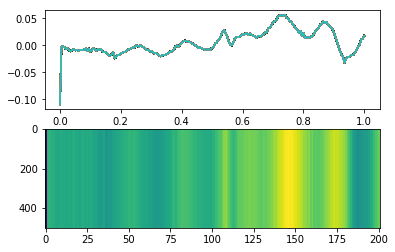

In [199]:
#plt.plot(complex_er.real,complex_er.imag, '-')display(Markdown('> *' + time.ctime() + '* <br>🏃 Start calibration, please wating... ![](gif/808.gif)'))

#button2.layout.visibility = 'hidden'

#import qgrid
# qgrid.nbinstall(overwrite=True)

inst.query("*IDN?")
inst.query("SYST:ERR?")
inst.write("SENS:SWE:POIN 201")
inst.query("SENS:SWE:POIN?")
inst.write("SENS:SWE:TYPE LIN")
inst.query("SENS:SWE:TYPE?")
inst.query("SERV:SWE:FREQ:MAX?")
inst.query("SERV:SWE:FREQ:MIN?")
inst.write("TRIG:SOUR BUS")
inst.query("TRIG:SOUR?")
inst.write("TRIG:SING")
resp = eval('[' + inst.query("CALC:TRAC:DATA:FDAT?") + ']')

from tqdm import tqdm_notebook
import numpy as np
#from IPython import display
from array import *

#T = np.random.randint(10, size=(201, 100))
sweep = 500
T = np.empty([sweep, 201])

plt.subplot(2, 1, 1)
for i in tqdm_notebook(range(sweep)):
    inst.write("TRIG:SING")
    resp = eval('[' + inst.query("CALC:TRAC:DATA:FDAT?") + ']')
    deinterleaved = [resp[idx::2] for idx in range(2)]
    T[i] = deinterleaved[0]
    length = deinterleaved[0].__len__()
    x = np.linspace(0, 1, length)
    plt.plot(x, deinterleaved[0])

plt.subplot(2, 1, 2)
# plt.imshow(T, cmap='hot', interpolation='nearest')
plt.imshow(T, cmap='viridis', interpolation='nearest', aspect='auto')
plt.show()

In [17]:
from nbconvert import get_export_names, export, get_exporter
from nbconvert.writers import FilesWriter
from nbformat import read, NO_CONVERT
from nbconvert.utils.exceptions import ConversionException

import ipywidgets as widgets
from IPython.display import display, clear_output, Javascript
from traitlets import Unicode

notebook_name = widgets.Text()

js = """IPython.notebook.kernel.widget_manager.get_model('%s').then(function(model) {
    model.set('value', IPython.notebook.notebook_name);
    model.save();
});
""" % notebook_name.model_id
display(Javascript(data=js))

filename = notebook_name.value
filename

display(Markdown('> *' + time.ctime() + '* <br>✔️ Calibration is done... ![](gif/386.gif)'))

save_button = widgets.Button(
    description='Save',
    disabled=False,
    button_style='info',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='save'
)
print_button = widgets.Button(
    description='Print',
    disabled=False,
    button_style='',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='print'
)
share_button = widgets.Button(
    description='Share',
    disabled=False,
    button_style='',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='share'
)
download_link = widgets.HTML(visible=False)

widgets.HBox([save_button, print_button, share_button, download_link])

# file_writer = FilesWriter()

# def export_nb(name, nb):
#     # Get a unique key for the notebook and set it in the resources object.
#     notebook_name = name[:name.rfind('.')]
#     resources = {}
#     resources['unique_key'] = notebook_name
#     resources['output_files_dir'] = '%s_files' % notebook_name

#     # Try to export
#     try:
#         output, resources = export(get_exporter('pdf'), nb)
#     except ConversionException as e:
#         download_link.value = "<br>Could not export notebook!"
#     else:
#         write_results = file_writer.write(output, resources, notebook_name=notebook_name)

#         download_link.value = "<br>Results: <a href='files/{filename}'><i>\"{filename}\"</i></a>".format(filename=write_results)
#         download_link.visible = True

# def handle_export(widget):
#     with open(filename, 'r') as f:
#         export_nb(filename, read(f, NO_CONVERT))

# share_button.on_click(handle_export)

<IPython.core.display.Javascript object>

> *Mon Apr 22 09:11:34 2019* <br>✔️ Calibration is done... ![](gif/386.gif)